In [2]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import numpy as np

# set the color scheme & the plot size
sns.set_palette("RdBu_r", 20)
sns.set(rc={"image.cmap": "RdBu_r", "axes.grid": False})
sns.set_context(rc={"figure.figsize": (12, 8)})
sns_color = sns.color_palette()

# plt.rcParams['figure.figsize'] = (10, 10)
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

In [3]:
DIR_PATH = '/shared/flickr_style/'
SAVE_PATH = '/home/hawk/Dropbox/linux/vision_project/graph/'
TRAIN_TXT = 'train.txt'
TEST_TXT = 'test.txt'
CLASS_NAME_TXT = 'style_names.txt'
TEST_RESULT = './label_result_bonggunet.csv'
style_names = np.loadtxt(DIR_PATH + CLASS_NAME_TXT, str, delimiter='\t')

In [4]:
df_test = pd.read_csv(DIR_PATH + TEST_TXT, delimiter=' ', header=None)
df_test.columns = ['url', 'class']
df_test.tail()

,url,class
15981,/home/hawk/imagenet2014/caffe/data/flickr_styl...,1
15982,/home/hawk/imagenet2014/caffe/data/flickr_styl...,4
15983,/home/hawk/imagenet2014/caffe/data/flickr_styl...,9
15984,/home/hawk/imagenet2014/caffe/data/flickr_styl...,5
15985,/home/hawk/imagenet2014/caffe/data/flickr_styl...,10


In [5]:
df_test['class'].value_counts()

15    800
19    800
16    800
1     800
9     800
17    800
18    800
7     800
3     800
4     800
14    800
12    799
2     799
13    799
6     799
0     799
11    798
10    798
8     798
5     797
dtype: int64

In [6]:
df_train = pd.read_csv(DIR_PATH + TRAIN_TXT, delimiter=' ', header=None)
df_train.columns = ['url', 'class']
df_train['class'].value_counts()

9     3200
17    3200
16    3200
3     3200
14    3200
8     3200
7     3199
13    3199
12    3199
4     3199
18    3199
5     3198
19    3198
0     3198
11    3197
2     3197
10    3196
1     3196
15    3195
6     3194
dtype: int64

In [7]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
df_result = pd.read_csv(TEST_RESULT, header=None)
df_result.columns = ['true', 'path', 'truelabel', 'pred']
df_result.tail()

,true,path,truelabel,pred
10321,4,/home/hawk/imagenet2014/caffe/data/flickr_styl...,4,4
10322,18,/home/hawk/imagenet2014/caffe/data/flickr_styl...,18,18
10323,5,/home/hawk/imagenet2014/caffe/data/flickr_styl...,5,19
10324,12,/home/hawk/imagenet2014/caffe/data/flickr_styl...,12,8
10325,4,/home/hawk/imagenet2014/caffe/data/flickr_styl...,4,12


In [9]:
target_names = style_names
y_true = df_result.true.values
y_pred = df_result.pred.values
df = pd.DataFrame(columns=['name', 'accuracy'])
df.name = style_names
df.accuracy = precision_score(y_true, y_pred, average=None)

In [10]:
df

,name,accuracy
0,Detailed,0.401914
1,Pastel,0.190397
2,Melancholy,0.256560
3,Noir,0.489076
4,HDR,0.505071
5,Vintage,0.330789
6,Long Exposure,0.559633
7,Horror,0.459510
8,Sunny,0.515789
9,Bright,0.306265


/home/hawk/.virtualenvs/py2/local/lib/python2.7/site-packages/pandas/tools/plotting.py:856: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


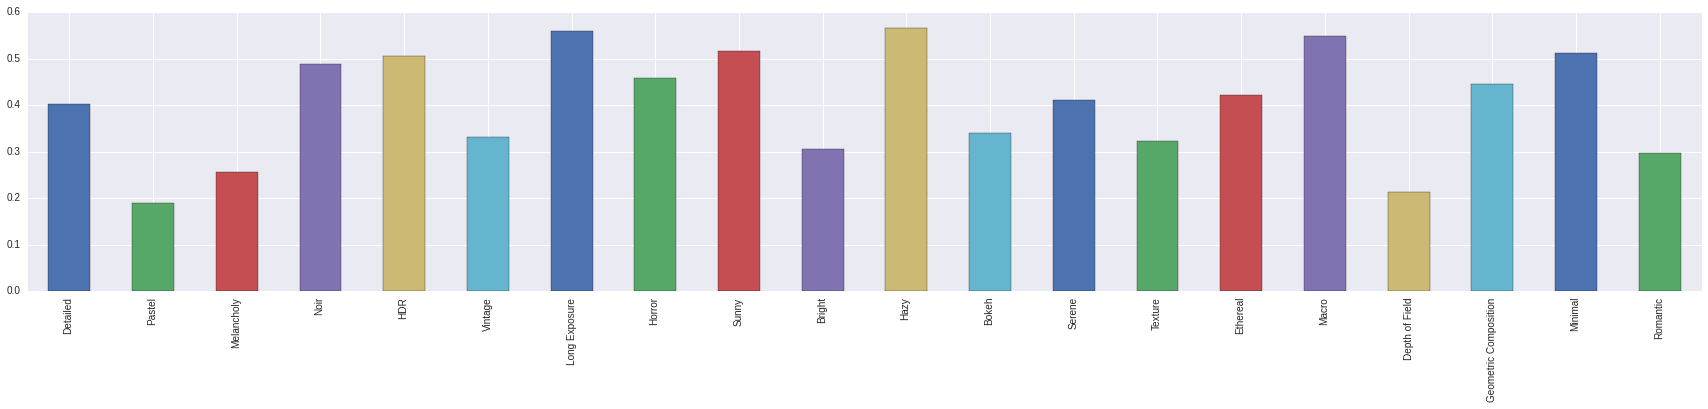

In [11]:
# plt.figure(figsize=(20, 3))
# plt.bar(range(20), df.accuracy.values, align='center')
# plt.xticks(np.arange(20), df.name.values)
# colors = ['c','b','g','y','r','m','c','b','g','y','r','m','c','b','g','y','r','m','c','b']
plt.rcParams['figure.figsize'] = (30, 5)
ax = df['accuracy'].plot(kind='bar', colors=sns_color)
ax.xaxis.set_ticklabels(style_names)
plt.savefig(SAVE_PATH + 'accuracy_table')

In [12]:
print precision_score(y_true, y_pred, average=None)
print precision_score(y_true, y_pred, average='weighted')

[ 0.40191388  0.19039735  0.25655977  0.48907563  0.50507099  0.3307888
  0.55963303  0.45951036  0.51578947  0.3062645   0.566       0.34057971
  0.41052632  0.32258065  0.4220339   0.54963235  0.21227621  0.44575472
  0.51171171  0.29700272]
0.405341132434


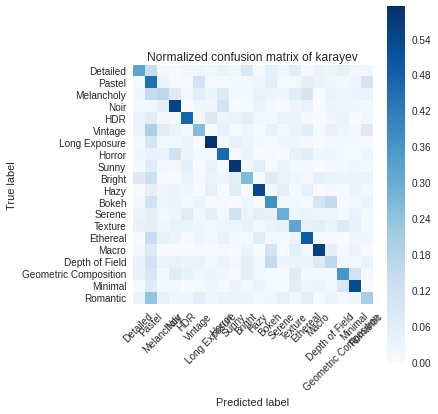

In [13]:
cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm_normalized, target_names, title='Normalized confusion matrix of karayev')
plt.savefig(SAVE_PATH + "confusion.png")
plt.show()